# Data Analysis Assignment 2: Customer Service Data Solutions

## Business Issue and Understanding

## Getting Started
You will have two csv files to work 

In [506]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

north = pd.read_csv("NorthCallCenter.csv")
south = pd.read_csv("SouthCallCenter.csv")

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis


1. How many reps are in each branch?
1. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
1. What is the number of calls taken for each time block?


<span style="color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>
#### EDA Question 1:  How many reps are in each branch?  

In [507]:
# Option using value_counts() 
# 9 in NORTH
# 11 in SOUTH

#SYNTAX USED:
# north_reps = north["Rep ID"].value_counts().count()
# north_reps

In [508]:
# Option using nunique()

# north_number_reps = north["Rep ID"].nunique()  # 9 reps in NORTH

# south_number_reps = south["Rep ID"].nunique()  # 11 reps in SOUTH


<span style="color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span> 
#### EDA Question 2:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch? 

In [509]:
# Question 2:
# north.describe()
# south.describe()

<span style="color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span> 
#### EDA Question 3:  What is the number of calls taken for each time block?

In [510]:
# Question 3: 
# north_calls_per_time_block = north["Time Block"].value_counts()
# north_calls_per_time_block

# OUTPUT
# 12:00 PM    45
# 10:00 AM    43
# 2:00 PM     35
# 3:00 PM     30
# 4:00 PM     28
# 11:00 AM    25
# 1:00 PM     17
# 5:00 PM     17
# 9:00 AM      5
# Name: Time Block, dtype: int64

# order of time blocks determined by count

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 

Clean your Data Set by checking for missing data, irregular data, unnecessary data, and inconsistent data.

**Questions to Answer:**
1. Are there any duplicates in the two data sets?
1. Is any of the data in these two data sets unnecessary?
1. Incoming wait time is null in many places.  Do all of those places correspond to outgoing calls?
1. In the north data set, there are 2 separate "YES" values for a sale.  Why and how do you rectify the issue?  

#### Question 1:
No

#### Question 2: 
No (at least not for the purpose of this exrecise)

<span style="color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>
#### Cleaning Question 3:  Do all of the Incoming Wait Time null values correspond to outgoing calls?  
##### Option 1: using value_counts() only

In [511]:
# north_in_out_check = north["Incoming or Outgoing"].value_counts()
# north_in_out_check

# OUTPUT:
# Outgoing    163
# Incoming     82
# Name: Incoming or Outgoing, dtype: int64

# north_iwt = north["Incoming Wait Time"].value_counts(dropna=False)
# north_iwt

# OUTPUT
# NaN    163
# 4.0     20
# 5.0     17
# 1.0     17
# 2.0     16
# 3.0     12
# Name: Incoming Wait Time, dtype: int64

##### Option 2: Create 2 tables based on incoming and outgoing then apply value_counts.  

Resource: https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html

In [512]:
# Question 1: Option 2 --> created 2 tables based on incoming/outgoing and then counted incoming wait time. more exact.

        
# Table 1:  Table containing ONLY outgoing calls from the north branch
# north_out_table = north[north["Incoming or Outgoing"] == "Outgoing"]
# north_out_table["Incoming Wait Time"].value_counts()

# OUTPUT
# Series([], Name: Incoming Wait Time, dtype: int64)

# Table 2: Table containing ONLY incoming calls from the north branch
# north_in_table = north[north["Incoming or Outgoing"] == "Incoming"]
# north_in_table["Incoming Wait Time"].value_counts()

# OUTPUT
# 4.0    20
# 5.0    17
# 1.0    17
# 2.0    16
# 3.0    12

<span style="color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>
#### Cleaning Question 4:  In the north data set, there are 2 separate "YES" values for a sale. Why and how do you rectify the issue? 

In [513]:
# yes_check = north["Sale"].value_counts()
# yes_check

    # OUTPUT
    # NO      234
    # YES      10
    # YES       1  # This yes is located in row 19
    # Name: Sale, dtype: int64

#SYNTAX USED:
# new_yes = north["Sale"].str.replace("YES ", "YES")  # There is an extra space after the "YES "
# new_yes.value_counts()
# north["Sale"] = new_yes
# north["Sale"].value_counts()

    #OUTPUT
    # NO     234
    # YES     11
    # Name: Sale, dtype: int64

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipuation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
1. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
1. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?
1. For each branch and the entire company, what is the average speed of answer?

<span style="color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>
#### Manipulation Question 1:  Sort by calls to determine which rep in each branch has the highest number of calls

In [514]:
# OUTPUT is a table listing each rep and their total number of calls:  
  # In the NORTH branch, Brent has 37 calls.  
  # In the SOUTH branch, Eric has 35 calls

#SYNTAX USED:
# north_reps = north.groupby("Rep ID").sum()
# north_reps.sort_values("Calls", ascending=False)

<span style="color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>
#### Manipulation Question 2:  What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [515]:
# data frame for the entire company
df = north.append(south)

# Average Call Abandonment Rates 
    # NORTH = 2.86% (rounding up to students)
    # SOUTH = 1.27%
    # COMPANY = 1.97%

#SYNTAX USED:
# avg_aban_rate_n = ((north["Abandoned"].sum()/north["Calls"].sum())*100).round(2)
# avg_aban_rate_n

<span style="color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>
#### Manipulation Question 3:  What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [516]:
# Question 3:

# NORTH 33 calls & 13.47%
# SOUTH 48 calls & 15.29%
# COMPANY 81 calls & 14.49%

# SYNTAX USED:
# seconds_n = (north["Incoming Wait Time"] <= 2.0).sum()
# n_call_eff = (seconds_n/north["Calls"].sum()*100).round(2)
# n_call_eff

In [517]:
# Question 4: 

# COMPANY average speed of answer = 3.019231 seconds
# NORTH average speed of answer =  3.048780 seconds
# SOUTH average speed of answer = 3.000000 seconds

#SYNTAX USED:
    # Option 1: describe()
# df.describe() # Look at Incoming Wait Time

    # Option 2: agg()
# company_avg = df["Incoming Wait Time"].agg("mean")
# company_avg





In [518]:
south.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.000000,314.00000,314.000000,126.000000,314.000000,314.0
mean,156.500000,0.035032,0.012739,10.05414,1.910828,3.000000,3.076433,1.0
std,90.788215,0.184154,0.112324,1.40751,0.860016,1.308434,0.819424,0.0
min,0.000000,0.000000,0.000000,8.00000,1.000000,1.000000,2.000000,1.0
25%,78.250000,0.000000,0.000000,9.00000,1.000000,2.000000,2.000000,1.0
50%,156.500000,0.000000,0.000000,10.00000,2.000000,3.000000,3.000000,1.0
75%,234.750000,0.000000,0.000000,11.00000,3.000000,4.000000,4.000000,1.0
max,313.000000,1.000000,1.000000,12.00000,3.000000,5.000000,4.000000,1.0


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

For each chart you created, eplain why you chose the chart style.

1. Abandonment Rate per Queue
1. What is the service level and average speed of answer per each rep?  <--
1. For each type of call purpose, how many calls are outgoing vs incoming?  
 

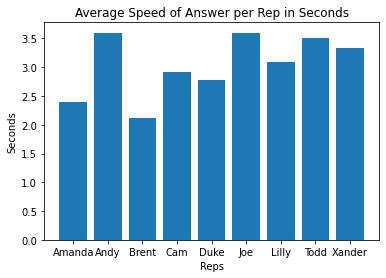

In [519]:
# average speed of answer = average incoming wait time per rep
north_plt = north.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

plt.title('Average Speed of Answer per Rep in Seconds')
plt.xlabel('Reps')
plt.ylabel('Seconds')

plt.bar(north_plt["Rep ID"], north_plt["Incoming Wait Time"])
plt.show()

In [542]:
# What is the service level per each rep?
# Service level is the percentage of calls answered within a specific number of seconds. (2 seconds)

quick_calls = north[north["Incoming Wait Time"] <= 2.0]
quick_calls.head()

reps_stats = quick_calls[["Rep ID", "Incoming Wait Time", "Calls"]]
reps_stats

,Rep ID,Incoming Wait Time,Calls
0,Brent,1.0,1
1,Cam,1.0,1
2,Todd,1.0,1
3,Brent,1.0,1
4,Brent,1.0,1
5,Duke,1.0,1
6,Joe,1.0,1
7,Lilly,1.0,1
8,Duke,1.0,1
9,Cam,1.0,1


<AxesSubplot:xlabel='Rep ID'>

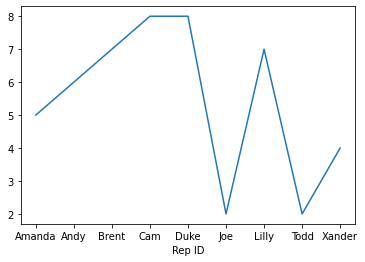

In [547]:
a = reps_stats.groupby(["Rep ID"]).sum()
a["Incoming Wait Time"].plot()

In [548]:
a

,Incoming Wait Time,Calls
Rep ID,,
Amanda,5.0,3
Andy,6.0,3
Brent,7.0,6
Cam,8.0,5
Duke,8.0,6
Joe,2.0,2
Lilly,7.0,4
Todd,2.0,2
Xander,4.0,2


Notes for Thursday - double plot this!
- currently have average calls within service level target
- overlap with calls not in the target??  
OR... am I not going in the right direction???
- OR COMPARE IT TO THE TOTAL TOTAL Number of calls??  

In [ ]:
# # Counts of how many 1 seconds and how many 2 seconds
# service_check=(rep_table.value_counts("Incoming Wait Time"))
# service_check

# # This is percentage of all staff
# # service_check=(rep_table["Rep ID"].value_counts("Incoming Wait Time")*100).round(2)
# # service_check

In [ ]:
serv_table = rep_table[["Rep ID", "Incoming Wait Time", "Calls"]]

serv_table["Service Level"] = (serv_table["Calls"].sum()/serv_table["Incoming Wait Time"].sum())
# serv_table["Service Level"] = serv_table.loc[:, ["Calls"]]/serv_table.loc[:, ["Incoming Wait Time"]]
serv_table.shape # 33, 4


In [ ]:
a["Service Level Percentage"] = (a["Calls"].sum()/a["Incoming Wait Time"].sum())*100
a.head()

In [ ]:


plt.title('Service Level Percentages Per Rep')
plt.xlabel('Reps')
plt.ylabel('Percentage of Calls Answered within 2 Seconds')

plt.bar(a["Rep ID"], a["Service Level Percentage"])
plt.show()

## Submit Your Work

## Bonus Mission

1. What are the time blocks of these call purposes? - groupby and plot  <--